In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
df=pd.read_csv("housing.csv")

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [22]:
mean_value = df['total_bedrooms'].mean()

# Replace null values in the feature with the mean
df['total_bedrooms'].fillna(mean_value, inplace=True)

In [23]:
x = df.drop(['median_house_value'],axis = 1)
y = df['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [24]:
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

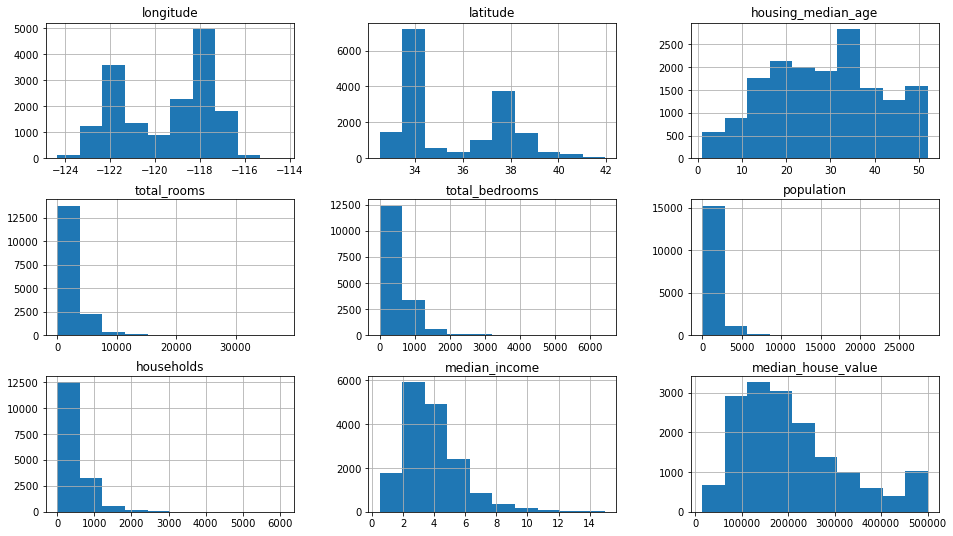

In [25]:
train_data.hist(figsize=(16,9))

In [26]:
#we add 1 to deal with 0 and small values
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['median_income'] = np.log(train_data['median_income'] + 1)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data['median_income'] = np.log(test_data['median_income'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [27]:
train_data = train_data.rename(columns={'<1H OCEAN': 'Less than 1 Hour Ocean'})
test_data = test_data.rename(columns={'<1H OCEAN': 'Less than 1 Hour Ocean'})
#we did this because we faced a problem in xgboost

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'Less than 1 Hour Ocean'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>],
       [<AxesSubplot:title={'center':'NEAR BAY'}>,
        <AxesSubplot:title={'center':'NEAR OCEAN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

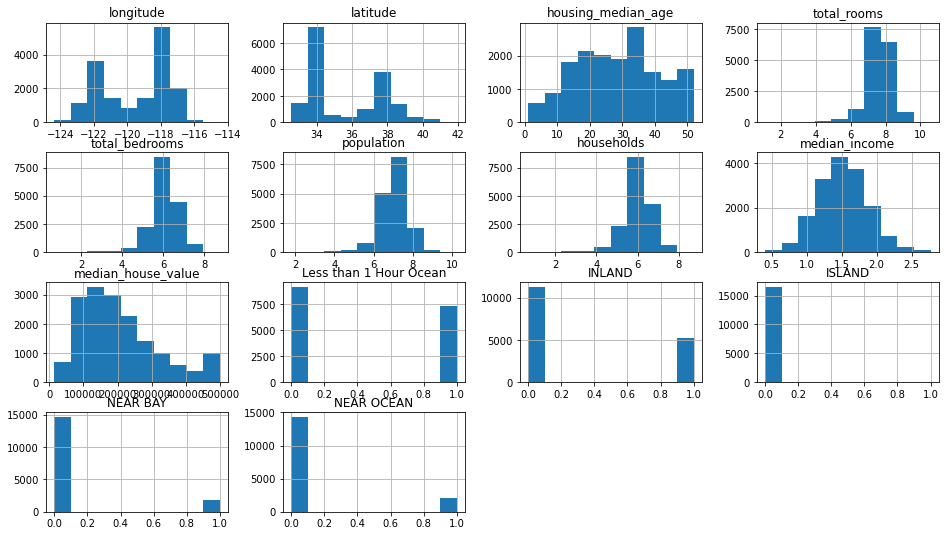

In [13]:
train_data.hist(figsize=(16,9))

In [28]:
x_train = train_data.drop(['median_house_value'],axis=1)
y_train = train_data['median_house_value']
x_test = test_data.drop(['median_house_value'],axis=1)
y_test = test_data['median_house_value']

In [183]:
def train_and_predict(model, x_train, y_train, x_test, y_test):
    @measure_energy(domains=[RaplPackageDomain(0)])
    def _train_and_predict():
        # Fit the model to the training data
        model.fit(x_train, y_train)

        # Predict on the test data
        predictions = model.predict(x_test)

        # Return predictions for further use if needed
        return predictions

    energy_consumption = _train_and_predict()


    # Print the R^2 score of the model
    r2_score = model.score(x_test, y_test)
    print(f'R^2 score: {r2_score}')


    # Print the energy consumption
    print(f'Energy consumption: {energy_consumption.sum()} Joules')

# Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=4)
train_and_predict(model, x_train, y_train, x_test, y_test)

begin timestamp : 1717417739.9136488; tag : _train_and_predict; duration : 0.006402015686035156; package_0 : 395751.0
R^2 score: 0.6195153198774805
Energy consumption: 843914246.8574791 Joules


# KNN

In [185]:
from sklearn.neighbors import KNeighborsRegressor

model =  KNeighborsRegressor(n_neighbors=11,n_jobs=3)
train_and_predict(model, x_train, y_train, x_test, y_test)

begin timestamp : 1717417750.0089185; tag : _train_and_predict; duration : 0.10521435737609863; package_0 : 6513777.0
R^2 score: 0.576825711052197
Energy consumption: 835090373.3636364 Joules


# Decision Tree

# Radom Forest

In [186]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=4)
train_and_predict(model, x_train, y_train, x_test, y_test)

begin timestamp : 1717417760.879579; tag : _train_and_predict; duration : 2.6424143314361572; package_0 : 173145125.0
R^2 score: 0.8124898331535118
Energy consumption: 852276810.29 Joules


# XGBOOST

In [197]:
from xgboost import XGBRegressor

model = XGBRegressor(max_depth = 7,alpha = 0.4515,eta = 0.0845,n_jobs=4)
train_and_predict(model, x_train, y_train, x_test, y_test)

begin timestamp : 1717419464.343176; tag : _train_and_predict; duration : 0.16426563262939453; package_0 : 11043429.0
R^2 score: 0.8238136552729756
Energy consumption: 848701568.0 Joules


# Light Boost

In [201]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(n_jobs=4)
train_and_predict(model, x_train, y_train, x_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1846
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 12
[LightGBM] [Info] Start training from score 207424.132994
begin timestamp : 1717419573.2347646; tag : _train_and_predict; duration : 0.16086244583129883; package_0 : 10739108.0
R^2 score: 0.8217481849335057
Energy consumption: 848362695.3123369 Joules


# CatBoost

In [213]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(learning_rate= 0.129,max_depth= 12,l2_leaf_reg= 17.7,verbose=False,thread_count=4)
train_and_predict(model, x_train, y_train, x_test, y_test)

begin timestamp : 1717420864.04919; tag : _train_and_predict; duration : 26.542285919189453; package_0 : 1859503113.0
R^2 score: 0.8366110287223871
Energy consumption: 848497218.4519578 Joules
